<a href="https://colab.research.google.com/github/Mathivanan7/telecom_customerchurndata/blob/main/customer_churn_data_decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [7]:
dt=pd.read_csv('/content/customer_churn_dataset.csv')

In [8]:
dt.head()

,customer_id,gender,age,marital_status,dependents,contract_type,internet_service,phone_service,multiple_lines,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,monthly_charges,total_charges,churn_status,call_duration_minutes,latitude,longitude
0,3850,Male,42,Married,3,Monthly,Fiber Optic,No,No,Yes,...,No,Yes,Yes,Yes,41.40,595.21,No,1062,-49.780269,-13.803970
1,4696,Female,76,Single,1,Yearly,DSL,No,Yes,Yes,...,No,Yes,Yes,No,46.20,940.05,No,901,56.553157,113.992914
2,5695,Female,39,Married,2,Monthly,Fiber Optic,Yes,No,Yes,...,No,No,Yes,No,43.05,919.62,No,928,80.762088,-27.906437
3,8712,Female,74,Single,3,Monthly,DSL,No,No,No,...,Yes,No,No,Yes,23.01,538.68,Yes,479,87.832819,86.922690
4,10506,Male,30,Married,3,Yearly,DSL,No,Yes,No,...,Yes,No,No,No,38.19,875.93,No,650,-88.373695,-29.320198


In [10]:
dt.shape

(500, 21)

In [11]:
dt.describe()

,customer_id,age,dependents,monthly_charges,total_charges,call_duration_minutes,latitude,longitude
count,500.000000,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,519770.864000,48.442000,1.5440,51.535580,523.183180,596.786000,0.915006,0.081410
std,288105.287058,17.458185,1.1343,29.383052,296.521689,336.445591,51.909861,100.505525
min,3850.000000,18.000000,0.0000,0.140000,2.570000,3.000000,-88.373695,-178.645120
25%,266212.000000,33.000000,1.0000,25.990000,277.372500,317.750000,-42.374942,-85.098356
50%,532085.000000,49.000000,2.0000,51.665000,543.750000,613.000000,-0.745630,2.257802
75%,769655.500000,63.000000,3.0000,77.942500,783.802500,864.250000,46.173488,84.043319
max,997121.000000,77.000000,3.0000,99.660000,999.570000,1198.000000,89.999598,178.067051


In [12]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            500 non-null    int64  
 1   gender                 500 non-null    object 
 2   age                    500 non-null    int64  
 3   marital_status         500 non-null    object 
 4   dependents             500 non-null    int64  
 5   contract_type          500 non-null    object 
 6   internet_service       500 non-null    object 
 7   phone_service          500 non-null    object 
 8   multiple_lines         500 non-null    object 
 9   online_security        500 non-null    object 
 10  online_backup          500 non-null    object 
 11  device_protection      500 non-null    object 
 12  tech_support           500 non-null    object 
 13  streaming_tv           500 non-null    object 
 14  streaming_movies       500 non-null    object 
 15  monthl

In [13]:
print(dt.gender.value_counts())

gender
Female    266
Male      234
Name: count, dtype: int64


In [14]:
print(dt.churn_status.value_counts())
print(dt.marital_status.value_counts())
print(dt.contract_type.value_counts())

churn_status
No     395
Yes    105
Name: count, dtype: int64
marital_status
Married    253
Single     247
Name: count, dtype: int64
contract_type
Yearly     263
Monthly    237
Name: count, dtype: int64


In [15]:
dt_dummies=pd.get_dummies(dt[['gender','marital_status','contract_type','internet_service','phone_service',
                                          'multiple_lines','online_security','online_backup','device_protection',
                             'tech_support','streaming_tv','streaming_movies',]],drop_first=True)

In [16]:
dt_dummies

,gender_Male,marital_status_Single,contract_type_Yearly,internet_service_Fiber Optic,phone_service_Yes,multiple_lines_Yes,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes
0,True,False,False,True,False,False,True,False,False,True,True,True
1,False,True,True,False,False,True,True,False,False,True,True,False
2,False,False,False,True,True,False,True,True,False,False,True,False
3,False,True,False,False,False,False,False,True,True,False,False,True
4,True,False,True,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
495,False,False,True,True,True,True,True,False,True,False,True,False
496,True,True,False,True,True,True,True,False,True,True,True,False
497,False,False,True,False,False,False,True,False,True,True,True,True
498,True,False,True,True,True,True,False,False,False,True,True,False


In [17]:
dt=dt.drop(['gender','marital_status','contract_type','internet_service','phone_service',
                                          'multiple_lines','online_security','online_backup','device_protection',
                             'tech_support','streaming_tv','streaming_movies','latitude','longitude'],axis=1)

In [18]:
dt=pd.concat([dt,dt_dummies],axis=1)

In [19]:
dt

,customer_id,age,dependents,monthly_charges,total_charges,churn_status,call_duration_minutes,gender_Male,marital_status_Single,contract_type_Yearly,internet_service_Fiber Optic,phone_service_Yes,multiple_lines_Yes,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes
0,3850,42,3,41.40,595.21,No,1062,True,False,False,True,False,False,True,False,False,True,True,True
1,4696,76,1,46.20,940.05,No,901,False,True,True,False,False,True,True,False,False,True,True,False
2,5695,39,2,43.05,919.62,No,928,False,False,False,True,True,False,True,True,False,False,True,False
3,8712,74,3,23.01,538.68,Yes,479,False,True,False,False,False,False,False,True,True,False,False,True
4,10506,30,3,38.19,875.93,No,650,True,False,True,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,980574,76,2,58.12,139.76,No,428,False,False,True,True,True,True,True,False,True,False,True,False
496,990832,76,2,81.67,434.50,No,370,True,True,False,True,True,True,True,False,True,True,True,False
497,994515,24,0,93.68,928.09,No,439,False,False,True,False,False,False,True,False,True,True,True,True
498,994922,43,0,85.05,998.00,No,238,True,False,True,True,True,True,False,False,False,True,True,False


In [20]:
x=dt.drop(['churn_status'],axis=1)

In [21]:
y=dt['churn_status']

In [22]:
x

,customer_id,age,dependents,monthly_charges,total_charges,call_duration_minutes,gender_Male,marital_status_Single,contract_type_Yearly,internet_service_Fiber Optic,phone_service_Yes,multiple_lines_Yes,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes
0,3850,42,3,41.40,595.21,1062,True,False,False,True,False,False,True,False,False,True,True,True
1,4696,76,1,46.20,940.05,901,False,True,True,False,False,True,True,False,False,True,True,False
2,5695,39,2,43.05,919.62,928,False,False,False,True,True,False,True,True,False,False,True,False
3,8712,74,3,23.01,538.68,479,False,True,False,False,False,False,False,True,True,False,False,True
4,10506,30,3,38.19,875.93,650,True,False,True,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,980574,76,2,58.12,139.76,428,False,False,True,True,True,True,True,False,True,False,True,False
496,990832,76,2,81.67,434.50,370,True,True,False,True,True,True,True,False,True,True,True,False
497,994515,24,0,93.68,928.09,439,False,False,True,False,False,False,True,False,True,True,True,True
498,994922,43,0,85.05,998.00,238,True,False,True,True,True,True,False,False,False,True,True,False


In [23]:
y

0       No
1       No
2       No
3      Yes
4       No
      ... 
495     No
496     No
497     No
498     No
499     No
Name: churn_status, Length: 500, dtype: object

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [25]:
from sklearn import tree
du=tree.DecisionTreeClassifier()
du.fit(x_train,y_train)
y_pred=du.predict(x_test)

In [26]:
du2=tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)
du2.fit(x_train,y_train)
y_pred2=du2.predict(x_test)

In [27]:
du3=tree.DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_leaf=4)
du3.fit(x_train,y_train)
y_pred3=du3.predict(x_test)

In [28]:
from sklearn import metrics
print('Accuracy M1:',metrics.accuracy_score(y_test,y_pred))
print('Accuracy M2:',metrics.accuracy_score(y_test,y_pred2))
print('Accuracy M3:',metrics.accuracy_score(y_test,y_pred3))

Accuracy M1: 0.66
Accuracy M2: 0.8266666666666667
Accuracy M3: 0.8266666666666667


<function matplotlib.pyplot.show(close=None, block=None)>

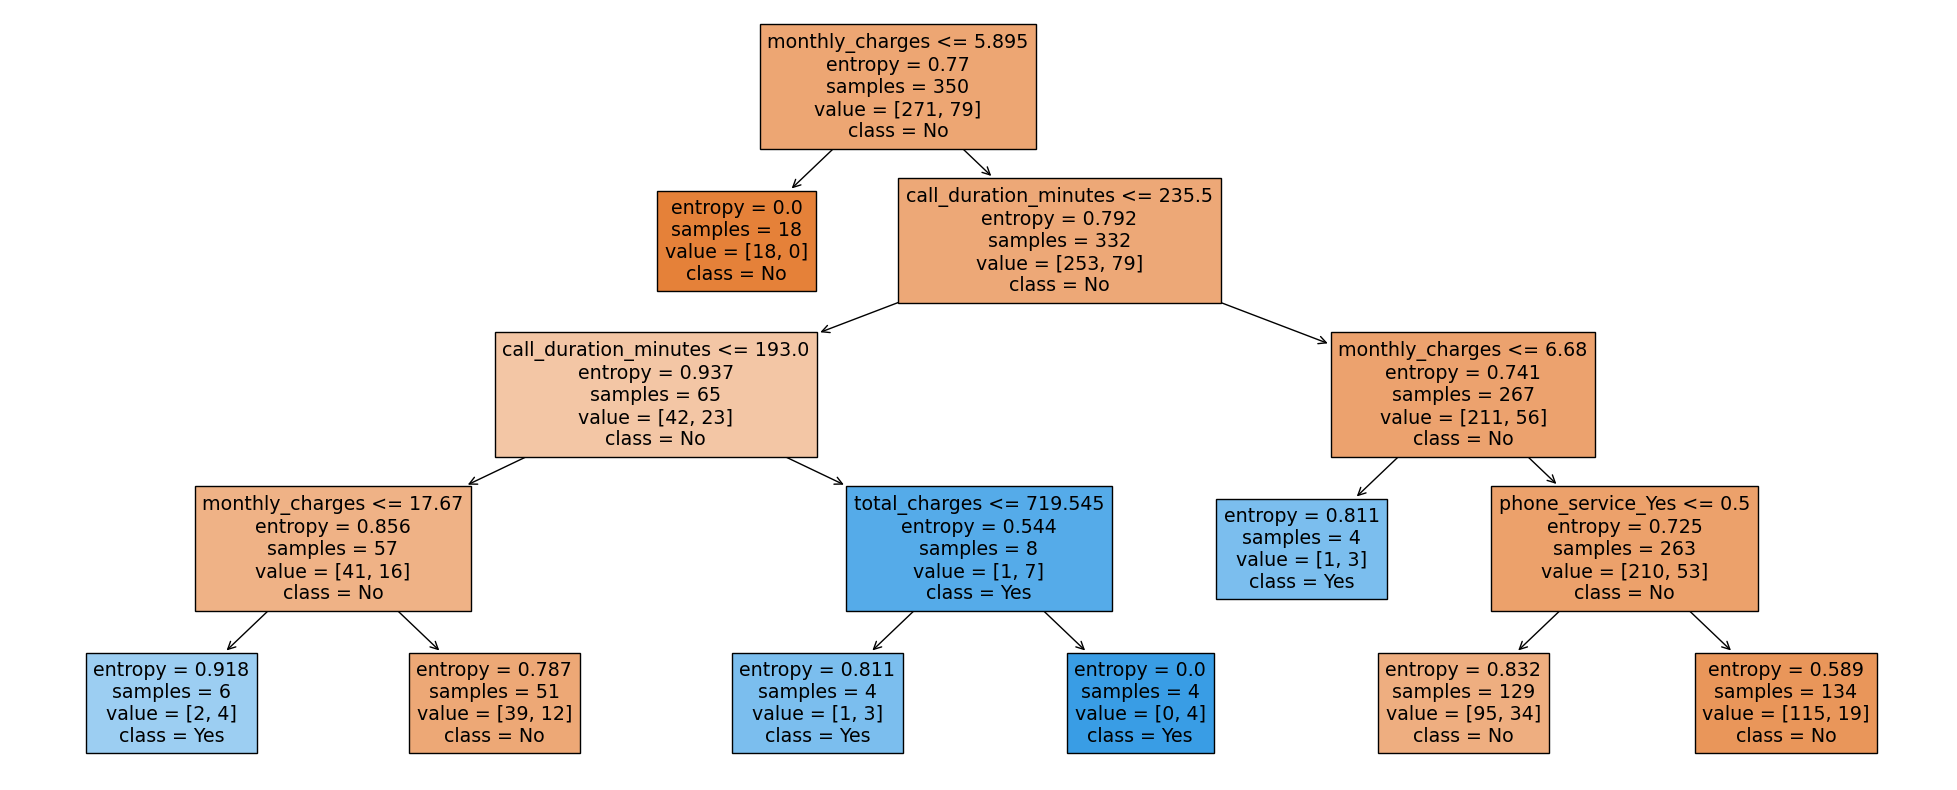

In [29]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
plot_tree(du3,class_names=['No','Yes'],feature_names=x.columns,filled=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

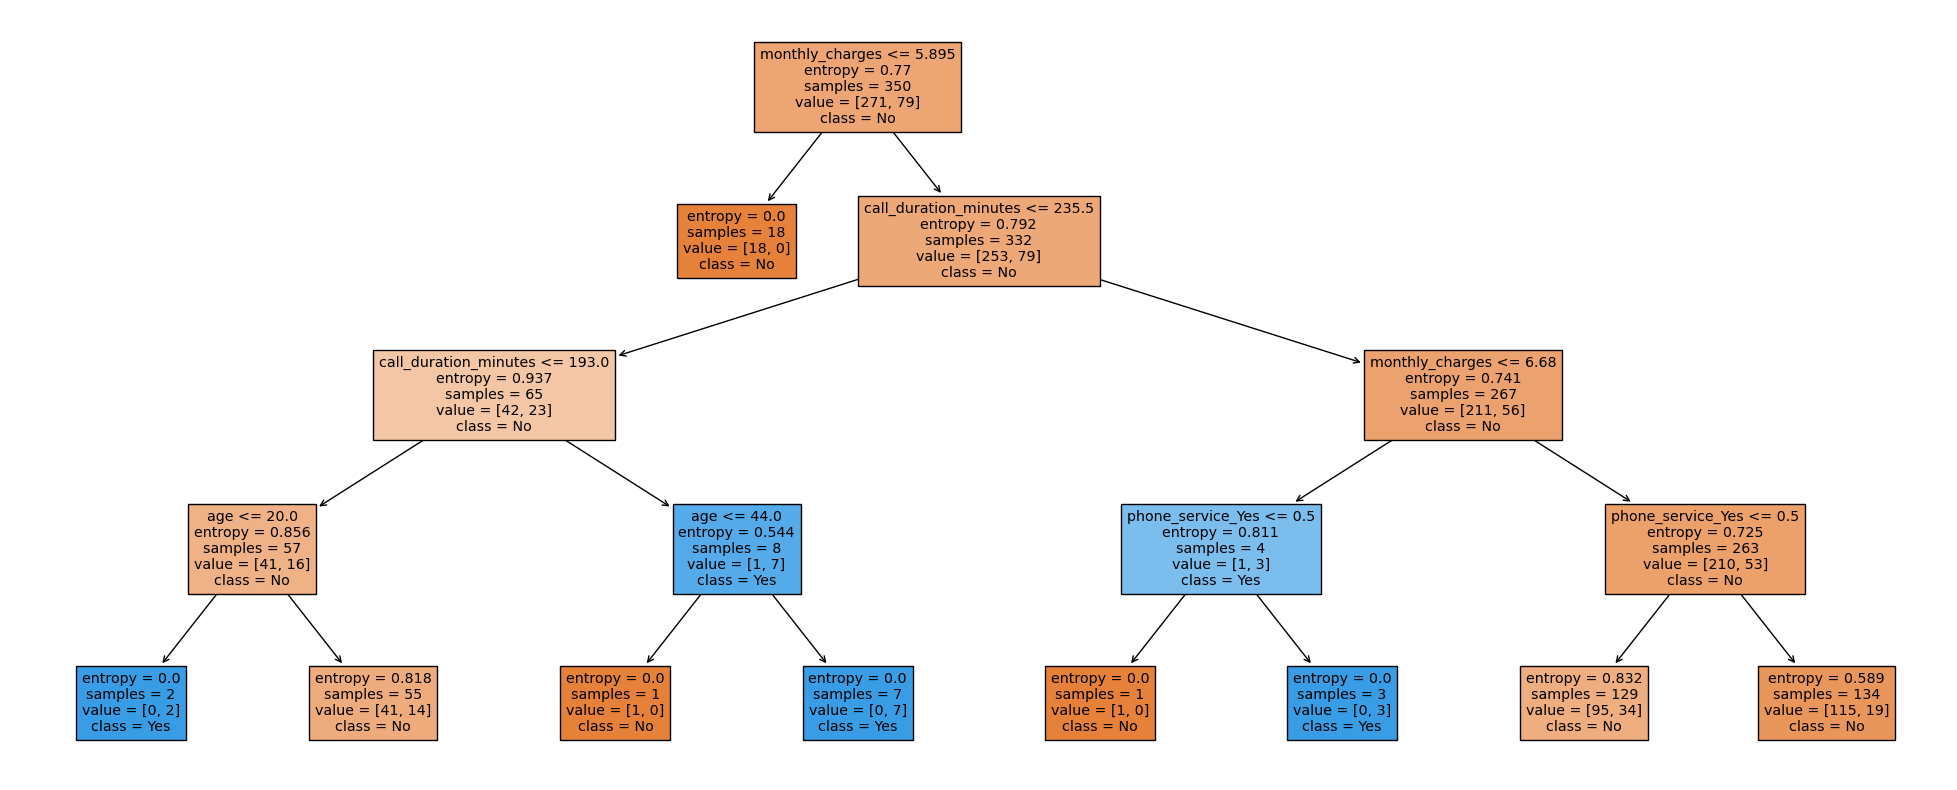

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
plot_tree(du2,class_names=['No','Yes'],feature_names=x.columns,filled=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

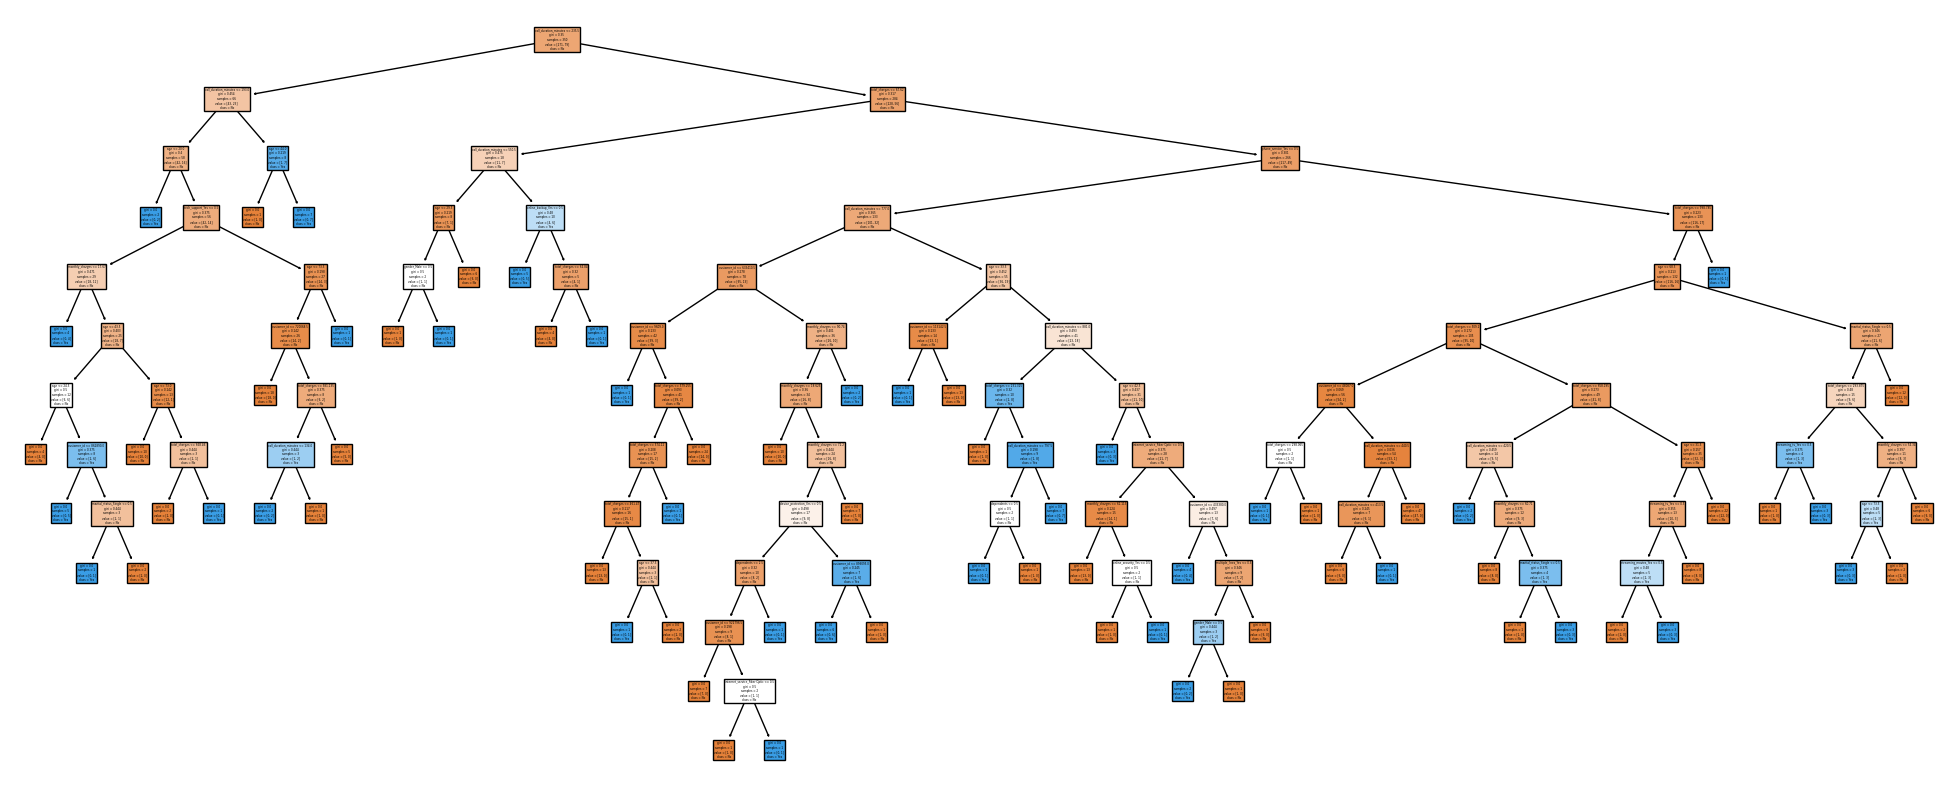

In [31]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
plot_tree(du,class_names=['No','Yes'],feature_names=x.columns,filled=True)
plt.show